### Codebase taken from:

https://www.tensorflow.org/tutorials/images/cnn

In [4]:
# !pip3 install ipynb

You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import gzip
import numpy as np

In [7]:
from ipynb.fs.full.CNN_numpy import extract_data, extract_labels

In [8]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [10]:
m=50000
img_dim=28

X_train = extract_data('data/train-images-idx3-ubyte.gz', m, img_dim)
y_train = extract_labels('data/train-labels-idx1-ubyte.gz', m).reshape(m,1)

m=10000
X_test = extract_data('data/t10k-images-idx3-ubyte.gz', m, img_dim)
y_test =extract_labels('data/t10k-labels-idx1-ubyte.gz', m).reshape(m,1)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [11]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [29]:
model = models.Sequential()
model.add(layers.Conv2D(8, 5, activation='relu', input_shape=(28,28,1)))
model.add(layers.Conv2D(8, 5, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

In [30]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 24, 24, 8)         208       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 20, 20, 8)         1608      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 8)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               102528    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 105,634
Trainable params: 105,634
Non-trainable params: 0
________________________________________________

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train.reshape((-1, 28,28,1)), y_train, epochs=2, 
                    validation_data=(X_test.reshape((-1,28,28,1)), y_test))

Epoch 1/2
1563/1563 [==============================] - 56s 35ms/step - loss: 0.3499 - accuracy: 0.8911 - val_loss: 0.0599 - val_accuracy: 0.9811
Epoch 2/2
1563/1563 [==============================] - 63s 41ms/step - loss: 0.0558 - accuracy: 0.9825 - val_loss: 0.0522 - val_accuracy: 0.9833


313/313 - 3s - loss: 0.0522 - accuracy: 0.9833


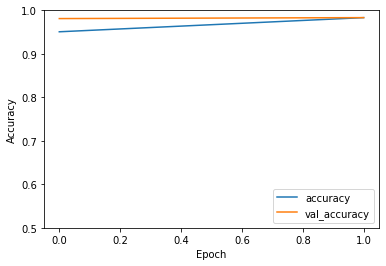

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test.reshape((-1,28,28,1)),  y_test, verbose=2)